In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D

Using TensorFlow backend.


In [2]:
#intialising the CNN
clasifier = Sequential()

In [3]:
#step 1 Convolution step
clasifier.add(Convolution2D(32,kernel_size=(3,3),activation = 'relu', input_shape=(64,64,3)))

In [4]:
#step 2 pooling 
clasifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#step 3 flatten
clasifier.add(Flatten())

In [ ]:
#step 4 full connection
clasifier.add(Dense(128, kernel_initializer ='uniform', activation = 'relu'))

In [ ]:
clasifier.add(Dense(5,kernel_initializer ='uniform' ,activation = 'softmax'))

In [ ]:
clasifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
trainig_set = train_datagen.flow_from_directory('dataset/training',target_size=(64, 64),batch_size=32,class_mode='categorical')

Found 3458 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('dataset/test',target_size=(64, 64),batch_size=32,class_mode='categorical')

Found 866 images belonging to 5 classes.


In [ ]:
history = clasifier.fit_generator(trainig_set,steps_per_epoch=3458,epochs=5,validation_data=test_set,validation_steps=866)

Epoch 1/5
3458/3458 [==============================] - 1708s 494ms/step - loss: 0.6411 - acc: 0.7540 - val_loss: 1.4992 - val_acc: 0.6306
Epoch 2/5
3458/3458 [==============================] - 9245s 3s/step - loss: 0.1607 - acc: 0.9469 - val_loss: 1.7839 - val_acc: 0.6744
Epoch 3/5
3458/3458 [==============================] - 1848s 535ms/step - loss: 0.0705 - acc: 0.9786 - val_loss: 2.4071 - val_acc: 0.6317
Epoch 4/5
3458/3458 [==============================] - 1810s 523ms/step - loss: 0.0579 - acc: 0.9834 - val_loss: 2.4457 - val_acc: 0.6487
Epoch 5/5
3455/3458 [============================>.] - ETA: 1s - loss: 0.0364 - acc: 0.9886

In [15]:
clasifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 3,937,925
Trainable params: 3,937,925
Non-trainable params: 0
_________________________________________________________________


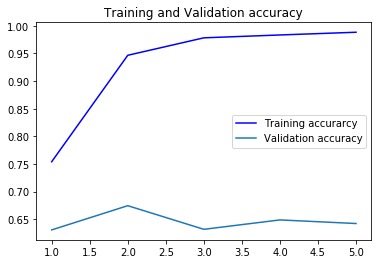

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='Training accurarcy')
plt.plot(epochs,val_acc, label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.show()

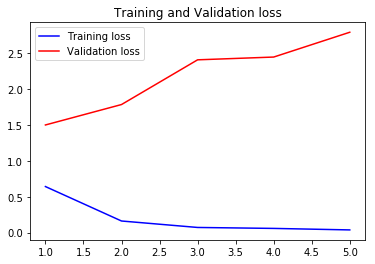

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,loss_val,'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()
plt.show()

In [28]:

pro = clasifier.predict_classes()

AttributeError: 'DirectoryIterator' object has no attribute 'ndim'